Assignment 10 - Association Rule Mining


Tyler Gardner

11/21/2021

# Task 1

## Code Chunk 1 - Data import and set up

In code chunk one the google colab notebook is set up to evaluate our data. We install the apyori package along with any other packages that are necessary for association rule mining throughout the notebook. We mount our google drive and import our data.

In [1]:
# 1. Install apyori package using code from tutorial
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=2f5bf2e501eda430035f0fdb08372f4e52cafe6bba7db629ca1f8c6d86cfe2e0
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
# 2.Load packages needed for association rule mining
import csv
from apyori import apriori
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as plt

In [3]:
# mount the google drive location to read the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 3. Import the dataset as a list
with open('/content/drive/MyDrive/data_sets/Walmart_baskets_1week_lst.csv', newline='') as f:
    reader = csv.reader(f)
    grocery_baskets = list(reader)

# Task 2

## Code Chunk 2 - Explore Dataset


In code chunk 2 we explore the data set by first showing the length of the list. We then run a command to show the first entry of the list. We then show the 10th through the 15th entry of the list using the slice notation provided in the tutorial. After doing that, the dataset is plotted using a horizontal barplot to show the count of each individual word.

In [5]:
# 1. Show the length of the list
len(grocery_baskets)

2000

In [6]:
# 2. SHow the first entry of the list
grocery_baskets[0]

['FABRICS AND CRAFTS']

In [7]:
# 3. Show the 10th through the 15th entry of the list. Use the slice notation provided in the tutorial
grocery_baskets[9:15]


[['FINANCIAL SERVICES', 'IMPULSE MERCHANDISE'],
 ['BRAS & SHAPEWEAR', 'PHARMACY OTC'],
 ['JEWELRY AND SUNGLASSES'],
 ['CANDY', ' TOBACCO', ' COOKIES', 'DSD GROCERY'],
 ['SHOES'],
 ['FINANCIAL SERVICES']]

In [8]:
# 4. Plot the dataset using a horizontal barplot to show the count of each individual word. Again see the tutorial for code needed.
flattened_list = [item for sublist in grocery_baskets for item in sublist]
flattened_list[0:20]


['FABRICS AND CRAFTS',
 'HARDWARE',
 'PERSONAL CARE',
 'PHARMACY OTC',
 'FROZEN FOODS',
 'PRODUCE',
 'SEAFOOD',
 'FROZEN FOODS',
 'LADIESWEAR',
 'FINANCIAL SERVICES',
 'FINANCIAL SERVICES',
 'CANDY',
 ' TOBACCO',
 ' COOKIES',
 'DSD GROCERY',
 'HOUSEHOLD PAPER GOODS',
 'BEAUTY',
 'FINANCIAL SERVICES',
 'IMPULSE MERCHANDISE',
 'BRAS & SHAPEWEAR']

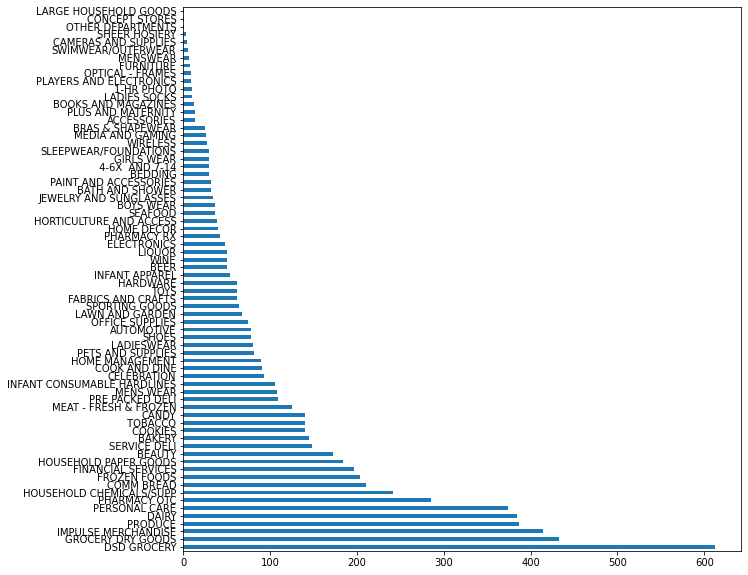

In [9]:
pd.get_dummies(flattened_list).sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,10))


# Task 3

## Code Chunk 3 - List of Rules

In code chunk 3 we start to change and explore what changing the confidence and support numbers do and print the rules that are returned using apriori. we first show 10-15 items and print the rules. We then use a function to print a more readable version of the rules. A text box is used in this section to call out any particular associations that look interesting.

In [10]:
# 1. Use apriori to show 10-15 items by changing the confidence, and support to reduce the number. Simply print the list of rules returned.
association_rules = apriori(grocery_baskets, min_support=0.075, min_confidence=0.35, min_lift=0.99) 
association_results = list(association_rules)

association_results


[RelationRecord(items=frozenset({'GROCERY DRY GOODS', 'COMM BREAD'}), support=0.0765, ordered_statistics=[OrderedStatistic(items_base=frozenset({'COMM BREAD'}), items_add=frozenset({'GROCERY DRY GOODS'}), confidence=0.7285714285714285, lift=3.3652259980204553), OrderedStatistic(items_base=frozenset({'GROCERY DRY GOODS'}), items_add=frozenset({'COMM BREAD'}), confidence=0.3533487297921478, lift=3.3652259980204557)]),
 RelationRecord(items=frozenset({'DSD GROCERY', 'DAIRY'}), support=0.1225, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'DSD GROCERY'}), confidence=0.6380208333333333, lift=2.085035403050109), OrderedStatistic(items_base=frozenset({'DSD GROCERY'}), items_add=frozenset({'DAIRY'}), confidence=0.40032679738562094, lift=2.085035403050109)]),
 RelationRecord(items=frozenset({'GROCERY DRY GOODS', 'DAIRY'}), support=0.117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'GROCERY DRY GOODS'}), 

In [11]:
# 2. Using the function from the assignment print a more readable version of the rules. 
def parse_results(rules):
  for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-------------")

In [12]:
association_rules = apriori(grocery_baskets, min_support=0.075, min_confidence=0.35, min_lift=0.99) 
association_results = list(association_rules)
parse_results(association_results)



Rule: GROCERY DRY GOODS -> COMM BREAD
Support: 0.0765
Confidence: 0.7285714285714285
Lift: 3.3652259980204553
-------------
Rule: DSD GROCERY -> DAIRY
Support: 0.1225
Confidence: 0.6380208333333333
Lift: 2.085035403050109
-------------
Rule: GROCERY DRY GOODS -> DAIRY
Support: 0.117
Confidence: 0.609375
Lift: 2.814665127020785
-------------
Rule: PRODUCE -> DAIRY
Support: 0.098
Confidence: 0.5104166666666666
Lift: 2.6446459412780654
-------------
Rule: GROCERY DRY GOODS -> DSD GROCERY
Support: 0.1305
Confidence: 0.42647058823529416
Lift: 1.9698410542045919
-------------
Rule: DSD GROCERY -> IMPULSE MERCHANDISE
Support: 0.0795
Confidence: 0.3840579710144928
Lift: 1.255091408544094
-------------
Rule: DSD GROCERY -> PERSONAL CARE
Support: 0.077
Confidence: 0.4117647058823529
Lift: 1.3456362937331796
-------------
Rule: DSD GROCERY -> PRODUCE
Support: 0.107
Confidence: 0.5544041450777202
Lift: 1.8117782518879744
-------------
Rule: GROCERY DRY GOODS -> PRODUCE
Support: 0.1035
Confidence: 

3 - In a text box call out any particular associations that looks interesting. Explain why you think they stand out from the rest. 

From the list, a particular pattern/association that looks interesting is the fact that 50% of this list is associated first with GROCERY DRY GOODS and 40% of the list is associated with DSD GROCERY. It is also interesting that GROCERY DRY GOODS only is listed first in the rules and not in the second position. The reason I think this stands out is that it is half the list and that it also shows that a lot of things have a relationship when GROCERY DRY GOODS are picked first, but not the other way around. It also makes sense though that GROCERY DRY GOODS is common if you look at the bar plot graph in task 2 of the notebook.

# Task 4 

## Code Chunk 4 - 3-5 Item List 

In code chunk 4 the apriori is used to show 3-5 items this time instead of 10-15 items. The confidence and support are left the same as done in Task 3/code chunk 3. The lift is increased in this code to reduce the number of rules. The same function used in the previous code chunk is used to print a more readable list.

In [13]:
# 1. Use apriori to show 3-5 items by printing the list returned. Leave the confidence, support the same as in Task 3. Increase the lift to reduce the number of rules. 
association_rules = apriori(grocery_baskets, min_support=0.075, min_confidence=0.35, min_lift=2.5) 
association_results = list(association_rules)

association_results


[RelationRecord(items=frozenset({'GROCERY DRY GOODS', 'COMM BREAD'}), support=0.0765, ordered_statistics=[OrderedStatistic(items_base=frozenset({'COMM BREAD'}), items_add=frozenset({'GROCERY DRY GOODS'}), confidence=0.7285714285714285, lift=3.3652259980204553), OrderedStatistic(items_base=frozenset({'GROCERY DRY GOODS'}), items_add=frozenset({'COMM BREAD'}), confidence=0.3533487297921478, lift=3.3652259980204557)]),
 RelationRecord(items=frozenset({'GROCERY DRY GOODS', 'DAIRY'}), support=0.117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'GROCERY DRY GOODS'}), confidence=0.609375, lift=2.814665127020785), OrderedStatistic(items_base=frozenset({'GROCERY DRY GOODS'}), items_add=frozenset({'DAIRY'}), confidence=0.5404157043879908, lift=2.814665127020785)]),
 RelationRecord(items=frozenset({'PRODUCE', 'DAIRY'}), support=0.098, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'PRODUCE'}), confidence=0.5

In [14]:
# 2. Again, using the function print a more readable version of the list.
def parse_results(rules):
  for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-------------")

association_rules = apriori(grocery_baskets, min_support=0.075, min_confidence=0.35, min_lift=2.5) 
association_results = list(association_rules)
parse_results(association_results)

Rule: GROCERY DRY GOODS -> COMM BREAD
Support: 0.0765
Confidence: 0.7285714285714285
Lift: 3.3652259980204553
-------------
Rule: GROCERY DRY GOODS -> DAIRY
Support: 0.117
Confidence: 0.609375
Lift: 2.814665127020785
-------------
Rule: PRODUCE -> DAIRY
Support: 0.098
Confidence: 0.5104166666666666
Lift: 2.6446459412780654
-------------
Rule: GROCERY DRY GOODS -> DSD GROCERY
Support: 0.09
Confidence: 0.46875
Lift: 3.5919540229885056
-------------


# Task 5 

## Code Chunk 5 - 1-2 Item List

Similar to Code chunks 3 & 4, apriori is used to show 1-2 items and printing the list returned. THe confidence, support and lift are all changed in this code chunk to help reduce it to 1-2 items. Again, the function used previously is used to print a more readable version of the list.

In [15]:
# 1. Use apriori to show 1-2 items by printing the list returned. Change the confidence, support and lift. 
association_rules = apriori(grocery_baskets, min_support=0.085, min_confidence=0.33, min_lift=2.8) 
association_results = list(association_rules)

association_results

[RelationRecord(items=frozenset({'GROCERY DRY GOODS', 'DAIRY'}), support=0.117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'GROCERY DRY GOODS'}), confidence=0.609375, lift=2.814665127020785), OrderedStatistic(items_base=frozenset({'GROCERY DRY GOODS'}), items_add=frozenset({'DAIRY'}), confidence=0.5404157043879908, lift=2.814665127020785)]),
 RelationRecord(items=frozenset({'GROCERY DRY GOODS', 'DSD GROCERY', 'DAIRY'}), support=0.09, ordered_statistics=[OrderedStatistic(items_base=frozenset({'DAIRY'}), items_add=frozenset({'GROCERY DRY GOODS', 'DSD GROCERY'}), confidence=0.46875, lift=3.5919540229885056), OrderedStatistic(items_base=frozenset({'GROCERY DRY GOODS'}), items_add=frozenset({'DSD GROCERY', 'DAIRY'}), confidence=0.4157043879907621, lift=3.393505208087854), OrderedStatistic(items_base=frozenset({'DSD GROCERY', 'DAIRY'}), items_add=frozenset({'GROCERY DRY GOODS'}), confidence=0.7346938775510204, lift=3.3935052080878543), OrderedS

In [16]:
# 2. Again, using the function print a more readable version of the list.
def parse_results(rules):
  for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-------------")

association_rules = apriori(grocery_baskets, min_support=0.085, min_confidence=0.33, min_lift=2.8) 
association_results = list(association_rules)
parse_results(association_results)

Rule: GROCERY DRY GOODS -> DAIRY
Support: 0.117
Confidence: 0.609375
Lift: 2.814665127020785
-------------
Rule: GROCERY DRY GOODS -> DSD GROCERY
Support: 0.09
Confidence: 0.46875
Lift: 3.5919540229885056
-------------


# Task 6

## Code Chunk 6 - Output HTML and IPYNB files

In the code below we render the colab notebook to an HTML output file to submit the assignment. The output of the HTML file is named A10_Gardner_Tyler.html

In [18]:
# Render A10_Gardner_Tyler.ipynb to an HTML output file.  
!cp "/content/drive/MyDrive/Colab Notebooks/A10_Gardner_Tyler.ipynb" ./

!jupyter nbconvert --to html "A10_Gardner_Tyler.ipynb"

[NbConvertApp] Converting notebook A10_Gardner_Tyler.ipynb to html
[NbConvertApp] Writing 401398 bytes to A10_Gardner_Tyler.html
